In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
from scipy.optimize import fsolve
from matplotlib import pyplot as plt
from ipywidgets import interact
import time

# Experimental Data Equations

In [3]:
def conversion(K):
    x = (K_start - K)/(K_start - K_final) 
    return x

In [4]:
def concNaOH(x):
    cB = 0.02*(1-x)
    return cB

# Theoretical Equations

In [5]:
def ri(C):
    CA, CB = C
    rA = -k*(CA**m)*(CB**n)
    rB = rA
    return rA, rB

In [6]:
def BR_dNAdt(N, t):
    NA, NB = N
    CA, CB = NA/V, NB/V
    rA, rB = ri([CA, CB])
    dNAdt = rA*V
    dNBdt = rB*V
    return dNAdt, dNBdt

In [7]:
def PFR_dCAdτ(C, τ):
    CA, CB = C
    rA, rB = ri([CA, CB])
    dCAdτ = rA
    dCBdτ = rB
    return [dCAdτ, dCBdτ]

In [8]:
def CSTR(F):
    FA, FB = F
    CA, CB = FA/Q, FB/Q
    rA, rB = ri([CA, CB])
    molbalA = FAo - FA + rA*V
    molbalB = FBo - FB + rB*V
    return molbalA, molbalB

# K-start and K-finish

### K-start

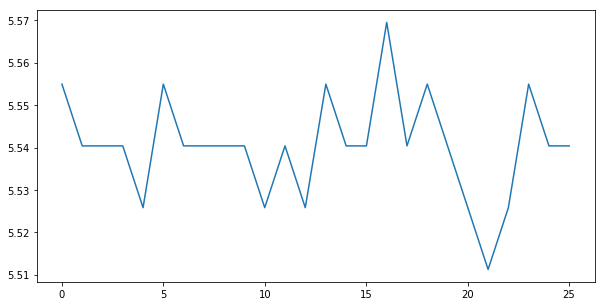

In [9]:
pKstart = pd.read_excel('Kstart_finish.xlsx', sheet_name = 'Kstart')

plt.figure(figsize=(10,5))
plt.plot(pKstart['t'], pKstart['K'])

In [10]:
K_start = pKstart['K'].mean()
print(K_start)

5.54038023076923


### K-finish

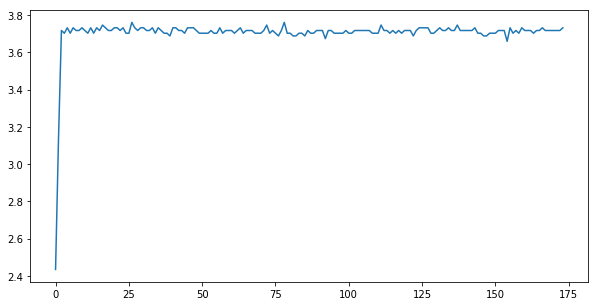

In [11]:
pKfin = pd.read_excel('Kstart_finish.xlsx', sheet_name = 'Kfinish')

plt.figure(figsize=(10,5))
plt.plot(pKfin['t'], pKfin['K'])

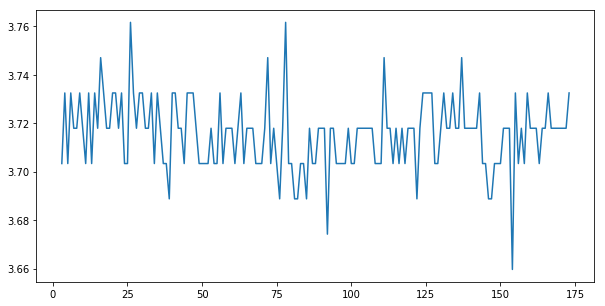

In [12]:
pKfin_ss = pd.DataFrame(data = pKfin, index = range(3, 175))

plt.figure(figsize=(10,5))
plt.plot(pKfin_ss['t'], pKfin_ss['K'])

In [13]:
K_final = pKfin_ss['K'].mean()
print(K_final)

3.7154611929824592


# Part 1 - Determine ambient kinetics

- Using a CSTR at 300mL

## Experimental Results

In [14]:
V = 300/1000 # L

In [15]:
SS_K_CSTR = []

### Q = 24 mL/min

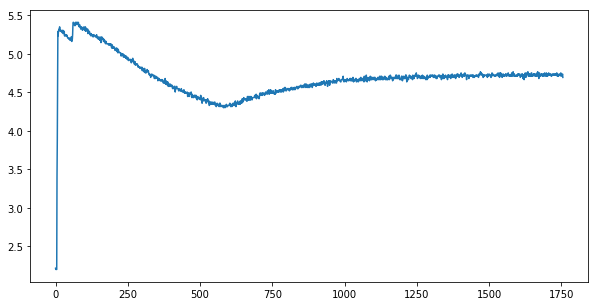

In [16]:
pCSTR_24 = pd.read_excel('Part 1 - CSTR.xlsx', sheet_name = 'Q=24')
t = pCSTR_24['t']
K = pCSTR_24['K']

plt.figure(figsize=(10,5))
plt.plot(t,K)

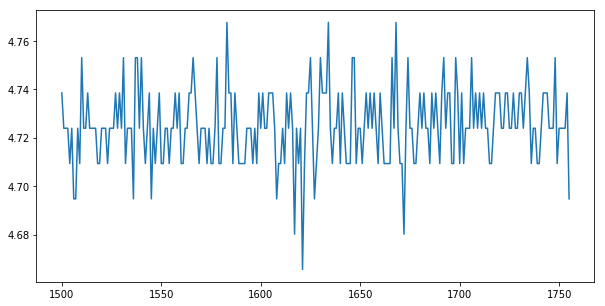

In [17]:
pSS_24mL_CSTR = pd.DataFrame(data = pCSTR_24, index = range(1500, 1757))

plt.figure(figsize=(10,5))
plt.plot(pSS_24mL_CSTR['t'], pSS_24mL_CSTR['K'])

In [18]:
SS_K_CSTR_24mL = pSS_24mL_CSTR['K'].mean()
print(SS_K_CSTR_24mL)

4.72500631249999


In [19]:
SS_K_CSTR.append(SS_K_CSTR_24mL)
print(SS_K_CSTR)

[4.72500631249999]


### Q = 30 mL/min

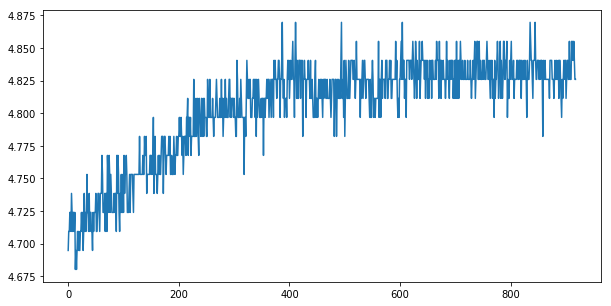

In [20]:
pCSTR_30 = pd.read_excel('Part 1 - CSTR.xlsx', sheet_name = 'Q=30')
t = pCSTR_30['t']
K = pCSTR_30['K']

plt.figure(figsize=(10,5))
plt.plot(t, K)

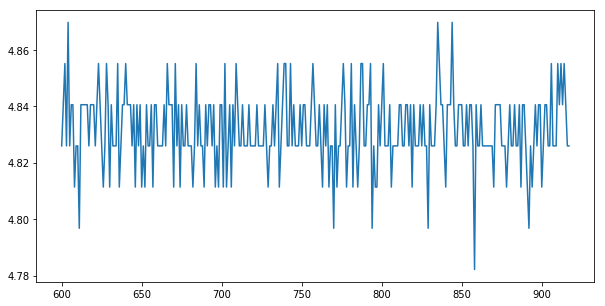

In [21]:
pSS_30mL_CSTR = pd.DataFrame(data = pCSTR_30, index = range(600, 919))

plt.figure(figsize=(10,5))
plt.plot(pSS_30mL_CSTR['t'], pSS_30mL_CSTR['K'])

In [22]:
SS_K_CSTR_30mL = pSS_30mL_CSTR['K'].mean()
print(SS_K_CSTR_30mL)

4.831574628930801


In [23]:
SS_K_CSTR.append(SS_K_CSTR_30mL)
print(SS_K_CSTR)

[4.72500631249999, 4.831574628930801]


### Q = 50 mL/min

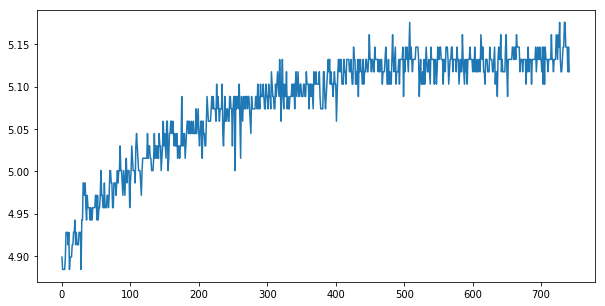

In [24]:
pCSTR_50 = pd.read_excel('Part 1 - CSTR.xlsx', sheet_name = 'Q=50')

plt.figure(figsize=(10,5))
plt.plot(pCSTR_50['t'], pCSTR_50['K'])

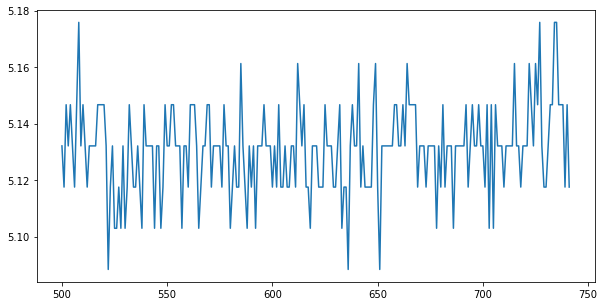

In [25]:
pSS_50mL_CSTR = pd.DataFrame(data = pCSTR_50, index = range(500, 743))

plt.figure(figsize=(10,5))
plt.plot(pSS_50mL_CSTR['t'], pSS_50mL_CSTR['K'])

In [26]:
SS_K_CSTR_50mL = pSS_50mL_CSTR['K'].mean()
print(SS_K_CSTR_50mL)

5.130887095041319


In [27]:
SS_K_CSTR.append(SS_K_CSTR_50mL)
print(SS_K_CSTR)

[4.72500631249999, 4.831574628930801, 5.130887095041319]


### Q = 60 mL/min

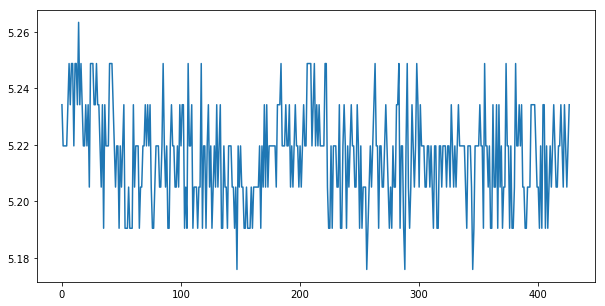

In [28]:
pCSTR_60 = pd.read_excel('Part 1 - CSTR.xlsx', sheet_name = 'Q=60')

plt.figure(figsize=(10,5))
plt.plot(pCSTR_60['t'], pCSTR_60['K'])

In [29]:
SS_K_CSTR_60mL = pCSTR_60['K'].mean()
print(SS_K_CSTR_60mL)

5.215908098360669


In [30]:
SS_K_CSTR.append(SS_K_CSTR_60mL)
print(SS_K_CSTR)

[4.72500631249999, 4.831574628930801, 5.130887095041319, 5.215908098360669]


In [31]:
x_CSTR = []
concB_CSTR = []
for K_CSTR in SS_K_CSTR:
    x = conversion(K_CSTR)
    cB = concNaOH(x)
    x_CSTR.append(x)
    concB_CSTR.append(cB)
print(x_CSTR)
print(concB_CSTR)

[0.44680005051517857, 0.3884038618491571, 0.22438975496936944, 0.1778008370179948]
[0.01106399898969643, 0.012231922763016859, 0.015512204900612612, 0.016443983259640103]


In [32]:
Q_CSTR = ((np.array([24, 30, 50, 60]))/1000)/60
τ_CSTR = V/Q_CSTR
print(τ_CSTR)

[750. 600. 360. 300.]


## Theoretical results

In [33]:
V = 300/1000     # L
CAo = 0.04       # mol/L
CBo = 0.02       # mol/L

In [34]:
k = 0.0265
m = 1
n = 1


In [35]:
Qrange = np.arange(22,80,2)    # mL/min
Qrange = (Qrange/1000)/60
τ = V/Qrange # min

In [36]:
Qrange

array([0.00036667, 0.0004    , 0.00043333, 0.00046667, 0.0005    ,
       0.00053333, 0.00056667, 0.0006    , 0.00063333, 0.00066667,
       0.0007    , 0.00073333, 0.00076667, 0.0008    , 0.00083333,
       0.00086667, 0.0009    , 0.00093333, 0.00096667, 0.001     ,
       0.00103333, 0.00106667, 0.0011    , 0.00113333, 0.00116667,
       0.0012    , 0.00123333, 0.00126667, 0.0013    ])

[0, 800, 0, 1]

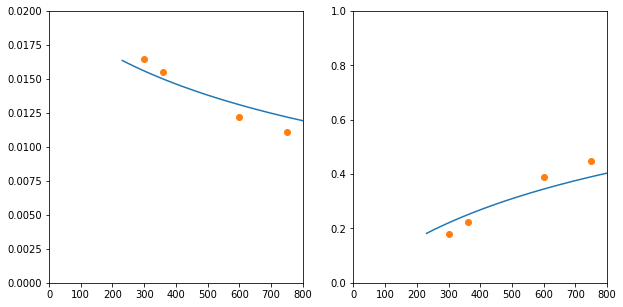

In [37]:
# def int_fun(k = 0.01, m = 1, n = 1):
CSTR1_CB = []
CSTR1_Conv = []

for Q in Qrange:
    FAo, FBo = CAo*Q, CBo*Q # mol/s
    F_CSTR = fsolve(CSTR, [FAo/2, FBo/2])
    C_CSTR = F_CSTR/Q
    CA, CB = C_CSTR
    CSTR1_CB.append(CB)
CSTR1_Conv = (CBo - np.array(CSTR1_CB)) / (CBo)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(τ, CSTR1_CB, '-')
plt.plot(τ_CSTR, concB_CSTR, 'o')
plt.axis([0,800,0,0.02])
plt.subplot(1,2,2)
plt.plot(τ, CSTR1_Conv, '-')
plt.plot(τ_CSTR, x_CSTR, 'o')
plt.axis([0,800,0,1])

# interact(int_fun, k = (0.01, 0.04, 0.0001), m = (0,2,1), n = (0,2,1))

In [38]:
# V=0.3
# k_acc=0
# m_acc=0
# n_acc=0
# CSTR1_CB_acc = []

# k_bound = 1
# m_bound = 2
# n_bound = 0
# factor=10
# k_bound=1
# k_factor=10000

# k_range = np.linspace(0,k_bound,k_bound*k_factor+1)
# m_range = np.linspace(0,m_bound,m_bound*factor+1)
# n_range = np.linspace(0,n_bound,n_bound*factor+1)

# Q_CSTR = ((np.array([24, 30, 50, 60]))/1000)/60
# τ_CSTR = V/Q_CSTR
# print(τ_CSTR)

# Qtrange = np.array((24,30,50,60))    # mL/min
# Qtrange = (Qtrange/1000)/60
# τ = V/Qtrange # min
# print (τ)

# error=100
# start=time.time()
# true_start= start

# for k in k_range:
    
#     if (k*k_factor/100)%5==0:
        
#         end=time.time()
#         print (k*k_factor/100,"%", "time= ", (end-start))
#         start=time.time()
        
#     for m in m_range:
        
#         for n in n_range:
            
#             n=2-m
            
#             squares=[]
    
#             CSTR1_CB = []
#             CSTR1_Conv = []
            
#             for index in range(len(Q_CSTR)):
                
#                 Q=Q_CSTR[index]
#                 #print (Q)
#                 FAo, FBo = CAo*Q, CBo*Q # mol/s
#                 F_CSTR = fsolve(CSTR, [FAo/2, FBo/2])
#                 C_CSTR = F_CSTR/Q
#                 CA, CB = C_CSTR
#                 CSTR1_CB.append(CB)
#                 squares.append((CB-concB_CSTR[index])**2)
                
#             error_test=sum(squares)
            
#             if error_test < error:
                
#                 error = error_test
#                 k_acc = k
#                 m_acc = m
#                 n_acc = n
#                 CSTR1_CB_acc = CSTR1_CB
                
# true_end=time.time()

# print ("Total Time = ", (true_end-true_start)/60)

In [39]:
k = 0.0114 
m = 2.0 
n = 0.0

In [40]:
# print (CSTR1_CB_acc,"\n",
#         error,"\n",
#         k_acc,"\n",
#         m_acc,"\n",
#         n_acc, "\n",
#           τ, τ_CSTR)

In [41]:
# plt.plot(τ_CSTR, concB_CSTR, 'o', τ,CSTR1_CB_acc)

# plt.figure(figsize=(10,5))
# plt.axis([0,800,0,0.02])

In [42]:
print (Qrange)

[0.00036667 0.0004     0.00043333 0.00046667 0.0005     0.00053333
 0.00056667 0.0006     0.00063333 0.00066667 0.0007     0.00073333
 0.00076667 0.0008     0.00083333 0.00086667 0.0009     0.00093333
 0.00096667 0.001      0.00103333 0.00106667 0.0011     0.00113333
 0.00116667 0.0012     0.00123333 0.00126667 0.0013    ]


[0, 800, 0, 1]

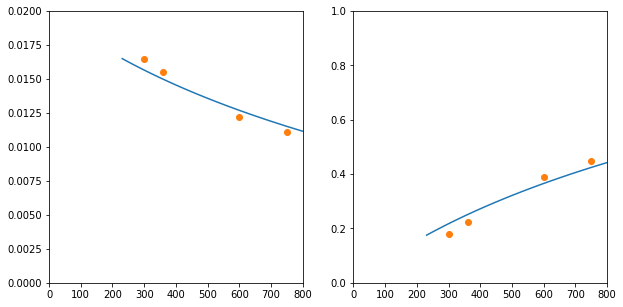

In [43]:
# k=k_acc
# m=m_acc
# n=n_acc

Qrange = np.arange(22,80,2)    # mL/min
Qrange = (Qrange/1000)/60
τ = V/Qrange # min



CSTR1_CB = []
CSTR1_Conv = []

for Q in Qrange:
    FAo, FBo = CAo*Q, CBo*Q # mol/s
    F_CSTR = fsolve(CSTR, [FAo/2, FBo/2])
    C_CSTR = F_CSTR/Q
    CA, CB = C_CSTR
    CSTR1_CB.append(CB)
CSTR1_Conv = (CBo - np.array(CSTR1_CB)) / (CBo)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(τ, CSTR1_CB, '-')
plt.plot(τ_CSTR, concB_CSTR, 'o')
plt.axis([0,800,0,0.02])
plt.subplot(1,2,2)
plt.plot(τ, CSTR1_Conv, '-')
plt.plot(τ_CSTR, x_CSTR, 'o')
plt.axis([0,800,0,1])

# Part 2 - Test the ambient kinetics

## - 1. Batch Reactor (200mL total)

### Experimental Results

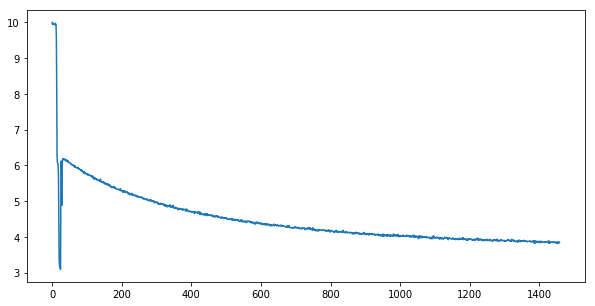

In [44]:
pBatch = pd.read_excel('Part 2 - Batch.xlsx', sheet_name = 'Batch')

plt.figure(figsize=(10,5))
plt.plot(pBatch['t'], pBatch['K'])

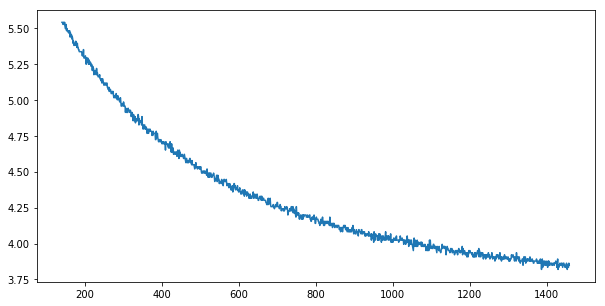

In [45]:
pBatch_refined = pd.DataFrame(data = pBatch, index = range(140,1460))

plt.figure(figsize=(10,5))
plt.plot(pBatch_refined['t'], pBatch_refined['K'])

In [46]:
t_exp = pBatch_refined['t']-140
Kvals = pBatch_refined['K']
x_Batch = []
concB_Batch = []
for K in Kvals:
    x = conversion(K)
    cB = concNaOH(x)
    x_Batch.append(x)
    concB_Batch.append(cB)

### Theoretical Results

In [47]:
V = 200/1000 # L
NAo, NBo = CAo*V, CBo*V
tspan = np.linspace(0, 24*60, 5000)
print (tspan)

[0.00000000e+00 2.88057612e-01 5.76115223e-01 ... 1.43942388e+03
 1.43971194e+03 1.44000000e+03]


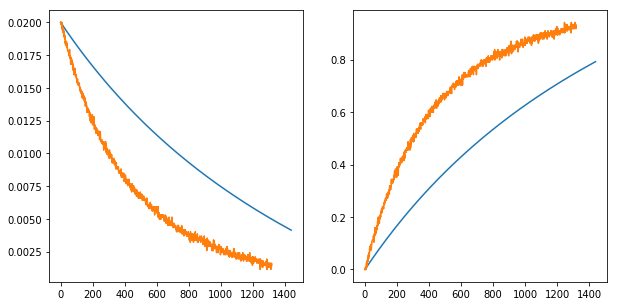

In [48]:
Ni = odeint(BR_dNAdt, [NAo, NBo], tspan)
Ci = Ni/V
CA, CB = Ci[:,0], Ci[:,1]
Batch_conv = (CBo - CB)/CBo

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(tspan, CB)
plt.plot(t_exp, concB_Batch)
plt.subplot(1,2,2)
plt.plot(tspan, Batch_conv)
plt.plot(t_exp, x_Batch)

## - 2. PFR 
- Volume is approximately 300mL -- Check!!!!

### Experimental Results

In [49]:
K_PFR_ss = []

##### Q = 30 mL/min

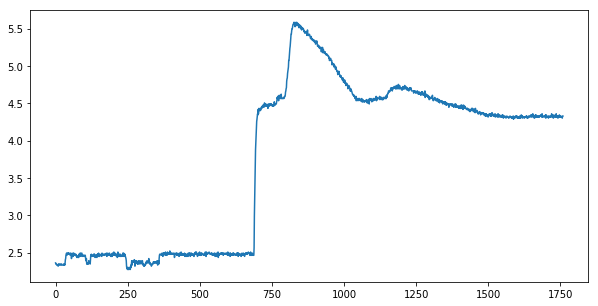

In [50]:
pPFR_30 = pd.read_excel('Part 2 - PFR.xlsx', sheet_name = 'Q=30')

plt.figure(figsize=(10,5))
plt.plot(pPFR_30['t'], pPFR_30['K'])

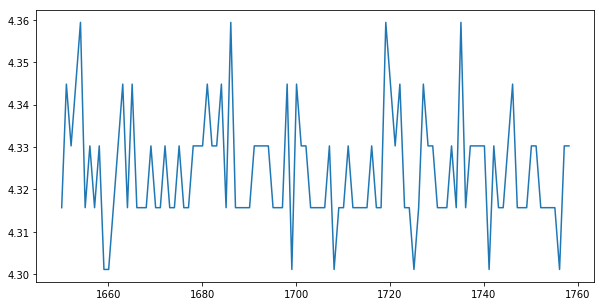

In [51]:
pPFR_30_refined = pd.DataFrame(data = pPFR_30, index = range(1650, 1759))

plt.figure(figsize=(10,5))
plt.plot(pPFR_30_refined['t'], pPFR_30_refined['K'])

In [52]:
K_PFR_30ss = pPFR_30_refined['K'].mean()
print(K_PFR_30ss)

4.3242566513761505


In [53]:
K_PFR_ss.append(K_PFR_30ss)

##### Q = 50 mL/min

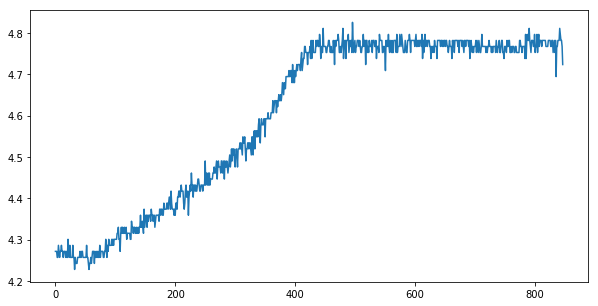

In [54]:
pPFR_50 = pd.read_excel('Part 2 - PFR.xlsx', sheet_name = 'Q=50')

plt.figure(figsize=(10,5))
plt.plot(pPFR_50['t'], pPFR_50['K'])

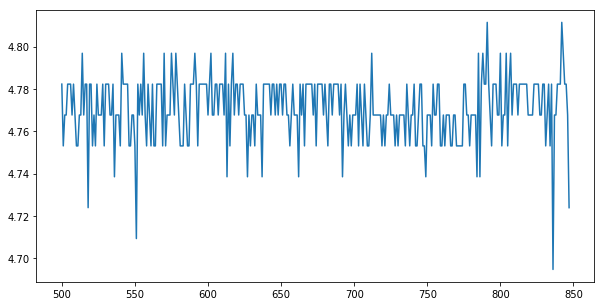

In [55]:
pPFR_50_refined = pd.DataFrame(data = pPFR_50, index = range(500, 848))

plt.figure(figsize=(10,5))
plt.plot(pPFR_50_refined['t'], pPFR_50_refined['K'])

In [56]:
K_PFR_50ss = pPFR_50_refined['K'].mean()
print(K_PFR_50ss)

4.770847126436807


In [57]:
K_PFR_ss.append(K_PFR_50ss)
print(K_PFR_ss)

[4.3242566513761505, 4.770847126436807]


In [58]:
x_PFR = []
concB_PFR = []
for K in K_PFR_ss:
    x = conversion(K)
    cB = concNaOH(x)
    x_PFR.append(x)
    concB_PFR.append(cB)

In [59]:
Q = ((np.array([30, 50]))/1000)/60  # L/s
V = 260/1000                        # L
τ_PFR = V/Q                         # s
print(τ_PFR)                        

[520. 312.]


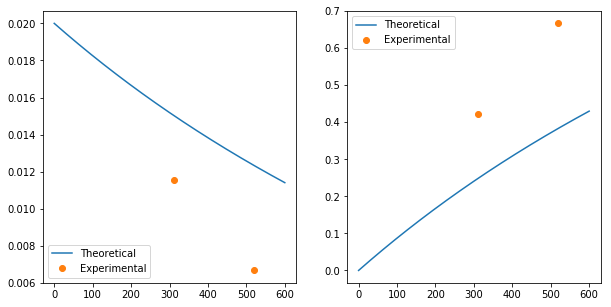

In [60]:
τ_span = np.linspace(0, 600, 1000)

C_PFR = odeint(PFR_dCAdτ, [CAo, CBo], τ_span)
CB_PFR = C_PFR[:,1]
PFR_conv = (CBo - CB_PFR)/CBo

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(τ_span, CB_PFR, '-', label = 'Theoretical')
plt.plot(τ_PFR, concB_PFR, 'o', label = 'Experimental')
plt.legend(loc = 'lower left')

plt.subplot(1,2,2)
plt.plot(τ_span, PFR_conv, '-', label = 'Theoretical')
plt.plot(τ_PFR, x_PFR,'o', label = 'Experimental')
plt.legend(loc = 'upper left')

### Theoretical Results

## 3. Two CSTRs in series
- Each CSTR volume is 150mL

### 3.1 Q = 30 mL/min

In [61]:
Q = (30/1000)/60 # L/s
CAo = 0.04       # mol/L
CBo = 0.02       # mol/L
V=0.15

#### 1st CSTR

In [62]:
FAo, FBo = CAo*Q, CBo*Q
F_CSTR = fsolve(CSTR, [FAo/2, FBo/2])
print(F_CSTR)
Ci_CSTR = F_CSTR/Q
print(Ci_CSTR)
cb_1_30=Ci_CSTR[-1]

[1.78263848e-05 7.82638483e-06]
[0.03565277 0.01565277]


#### 2nd CSTR

In [63]:
FAo, FBo = F_CSTR[0], F_CSTR[1]
F_CSTR = fsolve(CSTR, [FAo/2, FBo/2])
print(F_CSTR)
Ci_CSTR = F_CSTR/Q
print(Ci_CSTR)
cb_2_30=Ci_CSTR[-1]

[1.60617934e-05 6.06179338e-06]
[0.03212359 0.01212359]


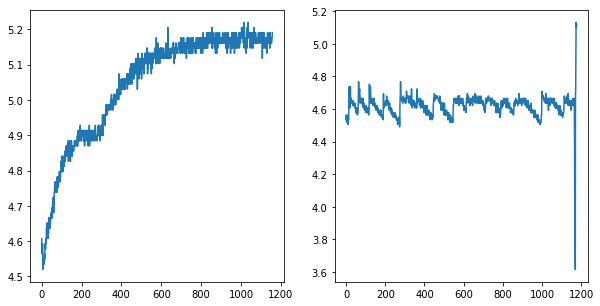

In [64]:
d_cstr_1_30 = pd.read_excel('part 2 - double cstr.xlsx', sheet_name = 'beaker 1 30')
d_cstr_2_30 = pd.read_excel('part 2 - double cstr.xlsx', sheet_name = 'beaker 2 30')

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(d_cstr_1_30["t"], d_cstr_1_30["K"])
plt.subplot(1,2,2)
plt.plot(d_cstr_2_30["t"], d_cstr_2_30["K"])

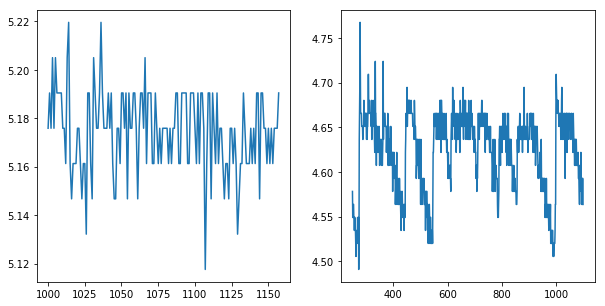

In [65]:
d_cstr_1_30_refined = pd.DataFrame(data = d_cstr_1_30, index = range(1000,1700))
d_cstr_2_30_refined = pd.DataFrame(data = d_cstr_2_30, index = range(250,1100))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(d_cstr_1_30_refined["t"], d_cstr_1_30_refined["K"])
plt.subplot(1,2,2)
plt.plot(d_cstr_2_30_refined["t"], d_cstr_2_30_refined["K"])

In [66]:
k_d_cstr_1_30 = d_cstr_1_30_refined['K'].mean()
print(k_d_cstr_1_30)
k_d_cstr_2_30 = d_cstr_2_30_refined['K'].mean()
print(k_d_cstr_2_30)
k_d_cstr_30=[k_d_cstr_1_30,k_d_cstr_2_30]

5.1745994240506255
4.623565325882345


[0.01599126537512352, 0.009952267624992486] 
 0.01565276965457559 0.012123586750601493


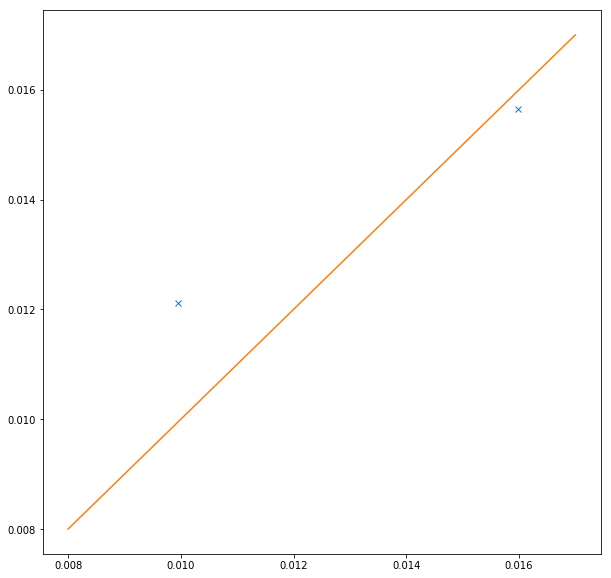

In [67]:
x_double_30 = []
concB_double_30 = []

for K in k_d_cstr_30:
    x = conversion(K)
    cB = concNaOH(x)
    x_double_30.append(x)
    concB_double_30.append(cB)
    
print (concB_double_30,"\n",
      cb_1_30,cb_2_30)

plt.figure(figsize=(10,10))
plt.plot(concB_double_30,(cb_1_30,cb_2_30),"x",(0.008,0.017),(0.008,0.017))

### 3.2 Q = 50 mL/min

In [68]:
Q = (50/1000)/60   # mL/min
CAo = 0.04 # mol/L
CBo = 0.02 # mol/L

#### 1st CSTR

In [69]:
FAo, FBo = CAo*Q, CBo*Q
F_CSTR = fsolve(CSTR, [FAo/2, FBo/2])
print(F_CSTR)
Ci_CSTR = F_CSTR/Q
print(Ci_CSTR)
cb_1_50=Ci_CSTR[-1]

[3.09713403e-05 1.43046737e-05]
[0.03716561 0.01716561]


#### 2nd CSTR

In [70]:
FAo, FBo = F_CSTR[0], F_CSTR[1]
F_CSTR = fsolve(CSTR, [FAo/2, FBo/2])
print(F_CSTR)
Ci_CSTR = F_CSTR/Q
print(Ci_CSTR)
cb_2_50=Ci_CSTR[-1]

[2.89128850e-05 1.22462183e-05]
[0.03469546 0.01469546]


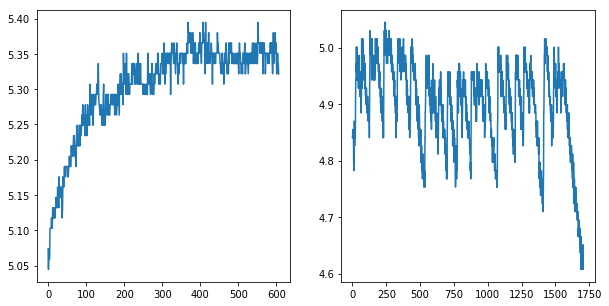

In [71]:
d_cstr_1_50 = pd.read_excel('part 2 - double cstr.xlsx', sheet_name = 'beaker 1 50')
d_cstr_2_50 = pd.read_excel('part 2 - double cstr.xlsx', sheet_name = 'beaker 2 50')

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(d_cstr_1_50["t"], d_cstr_1_50["K"])
plt.subplot(1,2,2)
plt.plot(d_cstr_2_50["t"], d_cstr_2_50["K"])

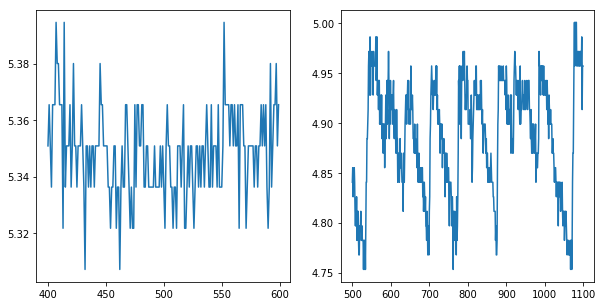

In [72]:
d_cstr_1_50_refined = pd.DataFrame(data = d_cstr_1_50, index = range(400,600))
d_cstr_2_50_refined = pd.DataFrame(data = d_cstr_2_50, index = range(500,1100))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(d_cstr_1_50_refined["t"], d_cstr_1_50_refined["K"])
plt.subplot(1,2,2)
plt.plot(d_cstr_2_50_refined["t"], d_cstr_2_50_refined["K"])

In [73]:
k_d_cstr_1_50 = d_cstr_1_50_refined['K'].mean()
print(k_d_cstr_1_50)
k_d_cstr_2_50 = d_cstr_2_50_refined['K'].mean()
print(k_d_cstr_2_50)
k_d_cstr_50=[k_d_cstr_1_50,k_d_cstr_2_50]

5.348440340000011
4.886316485000012


[0.017896455823026538, 0.012831860129395599] 
 0.017165608414952446 0.014695461950830371


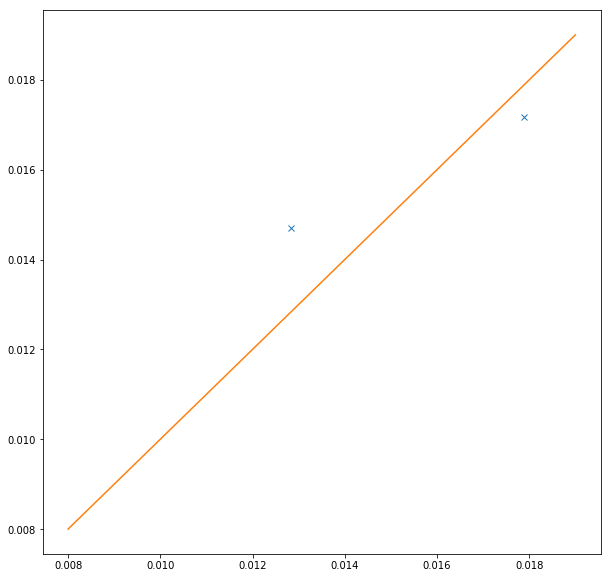

In [74]:
x_double_50 = []
concB_double_50 = []

for K in k_d_cstr_50:
    x = conversion(K)
    cB = concNaOH(x)
    x_double_50.append(x)
    concB_double_50.append(cB)
    
print (concB_double_50,"\n",
      cb_1_50,cb_2_50)

plt.figure(figsize=(10,10))
plt.plot(concB_double_50,(cb_1_50,cb_2_50),"x",(0.008,0.019),(0.008,0.019))


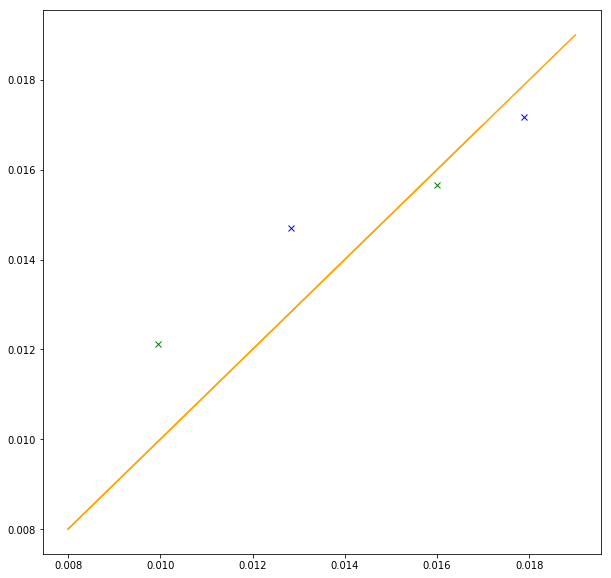

In [75]:
plt.figure(figsize=(10,10))
plt.plot(concB_double_50,(cb_1_50,cb_2_50),"xb",(0.008,0.019),(0.008,0.019), "orange")
plt.plot(concB_double_30,(cb_1_30,cb_2_30),"xg",(0.008,0.017),(0.008,0.017), "orange")

0.26522690245848146


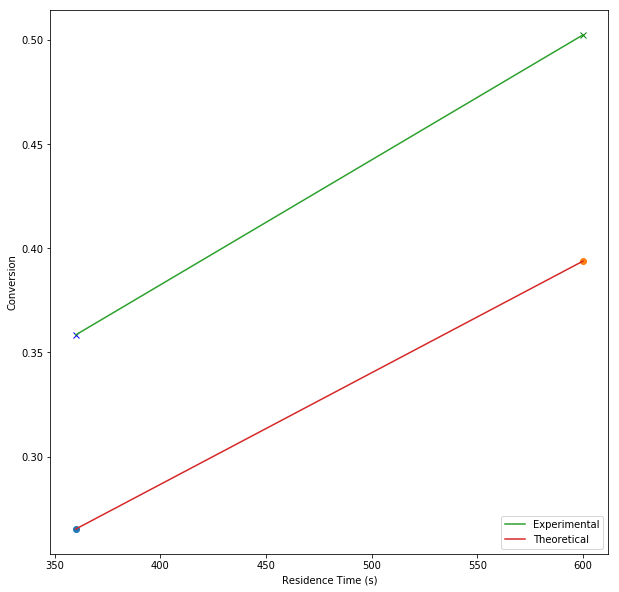

In [96]:
plt.figure(figsize=(10,10))
restime1=300*60/50
plt.plot(restime1,(CBo- concB_double_50[-1])/CBo,"xb",restime1,(CBo- cb_2_50)/CBo,"o")
print ((CBo- cb_2_50)/CBo)
restime2=300*60/30
plt.plot(restime2,(CBo- concB_double_30[-1])/CBo,"xg",restime2,(CBo- cb_2_30)/CBo,"o")
plt.plot((restime1,restime2),((CBo- concB_double_50[-1])/CBo,(CBo- concB_double_30[-1])/CBo), label = 'Experimental')
plt.plot((restime1,restime2),((CBo- cb_2_50)/CBo,(CBo- cb_2_30)/CBo), label = 'Theoretical')
plt.xlabel("Residence Time (s)")
plt.ylabel("Conversion")

plt.legend(loc = 'lower right')

In [86]:
tau_range = []
CB_range_d_cstr = []

for Q in range(30,51):
    Q=(Q/1000)/60
    tau_range.append(0.300/Q)
    FAo, FBo = CAo*Q, CBo*Q
    F_CSTR = fsolve(CSTR, [FAo/2, FBo/2])
    Ci_CSTR = F_CSTR/Q
    cb_1_50=Ci_CSTR[-1]
    
    FAo, FBo = F_CSTR[0], F_CSTR[1]
    F_CSTR = fsolve(CSTR, [FAo/2, FBo/2])
    Ci_CSTR = F_CSTR/Q
    cb_2_50=Ci_CSTR[-1]
    CB_range_d_cstr.append((CBo- cb_2_50)/CBo)
    
#     print(Ci_CSTR)
    
print (CB_range_d_cstr,"\n", tau_range)

[0.39382066246992536, 0.38445465209802715, 0.37553030135654314, 0.3670166439500687, 0.3588855820894914, 0.3511115575328513, 0.34367126743413934, 0.3365434179568598, 0.32970850985980854, 0.32314865126636144, 0.3168473936390615, 0.3107895876392766, 0.3049612560886795, 0.2993494816896971, 0.2939423075249528, 0.2887286486560889, 0.28369821339200424, 0.2788414330049073, 0.2741493988471566, 0.26961380596865836, 0.26522690245848146] 
 [600.0, 580.6451612903226, 562.5, 545.4545454545454, 529.4117647058823, 514.2857142857142, 500.0, 486.4864864864865, 473.6842105263158, 461.53846153846155, 450.0, 439.0243902439024, 428.57142857142856, 418.60465116279073, 409.09090909090907, 400.0, 391.30434782608694, 382.9787234042553, 374.99999999999994, 367.3469387755102, 359.99999999999994]


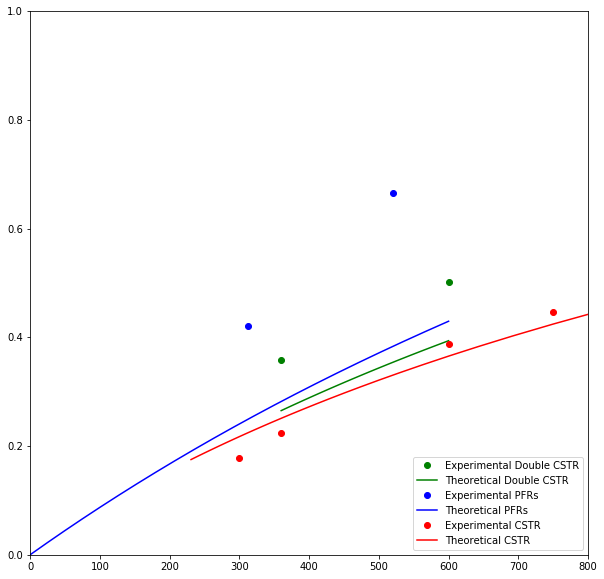

In [98]:
plt.figure(figsize=(10,10))

colour_1="green"
colour_2="black"
colour_3="blue"
colour_4="red"

plt.plot(restime1,(CBo- concB_double_50[-1])/CBo,"o",color=colour_1)
# plt.plot(restime1,(CBo- cb_2_50)/CBo,"o", color=colour_1)
plt.plot(restime2,(CBo- concB_double_30[-1])/CBo,"o",color=colour_1,label = 'Experimental Double CSTR')
# plt.plot(restime2,(CBo- cb_2_30)/CBo,"o", color=colour_1)
#plt.plot((restime1,restime2),((CBo- concB_double_50[-1])/CBo,(CBo- concB_double_30[-1])/CBo),color=colour_1, label = 'Experimental Double CSTR')
plt.plot(tau_range,CB_range_d_cstr,color=colour_1, label = 'Theoretical Double CSTR')

plt.plot(τ_PFR, x_PFR,'o',color=colour_3, label = 'Experimental PFRs')
plt.plot(τ_span, PFR_conv, '-',color=colour_3, label = 'Theoretical PFRs')

plt.plot(τ_CSTR, x_CSTR, 'o',color=colour_4, label = 'Experimental CSTR')
plt.plot(τ, CSTR1_Conv, '-',color=colour_4, label = 'Theoretical CSTR')
plt.axis([0,800,0,1])

plt.legend(loc = 'lower right')